# Package

In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from pytorch_lightning import loggers
from pytorch_lightning.callbacks import ModelCheckpoint

In [2]:
%load_ext autoreload
%autoreload 2

# Environment

In [3]:
device = "cuda" if torch.cuda.is_available else "cpu"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return "%.2f" % size, power_labels[n] + 'bytes'

torch.cuda.get_device_name(), format_bytes(torch.cuda.get_device_properties(device).total_memory)

('GeForce GTX 1080 Ti', ('10.92', 'gigabytes'))

# Load data

In [4]:
run_on = "CRC_DX"

In [5]:
from preprocessing.load_semi_dataset import get_semi_data

train_batch_size, unsup_batch_size = 64, 224
total_batch_size = train_batch_size + unsup_batch_size
trainset, ori_dataset, aug_dataset, valset = get_semi_data(train_batch_size = train_batch_size, unsup_batch_size = unsup_batch_size,
                                                           total_batch_size = total_batch_size, data_type = run_on)



>> Loading the trainset
Total images are 93408


>> Total labels sup patients vs unsup patients: 9342 and 84066


>> Total image in sup dataset, ori dataset and aug dataset
(9342, 4) (252198, 3) (252198, 3)


>> Loading the testset
Total images are 98904




In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = train_batch_size, shuffle = True, num_workers = 3)
ori_loader = torch.utils.data.DataLoader(ori_dataset, batch_size = unsup_batch_size, shuffle = False, num_workers = 3)
aug_loader = torch.utils.data.DataLoader(aug_dataset, batch_size = unsup_batch_size, shuffle = False, num_workers = 3)
valloader = torch.utils.data.DataLoader(valset, batch_size = total_batch_size, shuffle = False, num_workers = 4)

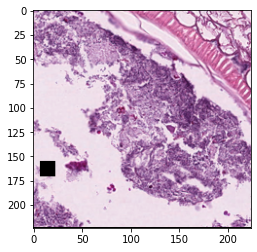

In [7]:
images = next(iter(aug_loader))

# print(images.shape, labels.shape)
def imshow(img):
    inp = img.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    # plt.show()
    
imshow(images[0])

# Train UDA

In [8]:
from trainer.semi_supervised.fixmatch import FixMatchTrainer

In [9]:
trainer = FixMatchTrainer(sup_loader = trainloader,
                    ori_loader = ori_loader,
                    aug_loader = aug_loader,
                    valloader = valloader,
                    valset = valset
                     )

{'backbone': 'resnet34', 'pretrained': False, 'netname': 'fixmatch', 'run_on': 'CRC_DX', 'save_model_dir': 'checkpoint/CRC_DX/fixmatch', 'tensorboard_name': 'fixmatch', 'running_mode': 'train', 'lambda_coeff': 1, 'fixmatch_confidence': 0.95, 'lr_threshold': [20, 40, 60, 100], 'lr_scheduler': 'cosine_anneling', 'weight_decay': 0.0005, 'momentum': 0.9, 'nesterov': True, 'base_lr': 0.004, 'max_lr': 0.03, 'warmup_step': 500, 'num_cycle': 0, 'epoch_per_cycle': 0, 'total_epoch': 0, 'total_step': 10000, 'num_updates': None}
/home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
/home/kientiet/Documents/My Project/python/ucla-cs168/logs/CRC_DX/fixmatch/version_21


In [ ]:
trainer.train()

SGD (
Parameter Group 0
    dampening: 0
    lr: 5.9999999999999995e-05
    momentum: 0.9
    nesterov: True
    weight_decay: 0.0005
)

>> Start to train at 1 epoch




>> Start to eval at 1 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_0.pth

>> Start to train at 2 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 2 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_1.pth

>> Start to train at 3 epoch




>> Start to eval at 3 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_2.pth

>> Start to train at 4 epoch




>> Start to eval at 4 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_3.pth

>> Start to train at 5 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 5 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_4.pth

>> Start to train at 6 epoch




>> Start to eval at 6 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_5.pth

>> Start to train at 7 epoch




>> Start to eval at 7 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_6.pth

>> Start to train at 8 epoch




>> Start to eval at 8 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_7.pth

>> Start to train at 9 epoch




>> Start to eval at 9 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_8.pth

>> Start to train at 10 epoch




>> Start to eval at 10 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_9.pth

>> Start to train at 11 epoch




>> Start to eval at 11 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_10.pth

>> Start to train at 12 epoch




>> Start to eval at 12 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_11.pth

>> Start to train at 13 epoch




>> Start to eval at 13 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_12.pth

>> Start to train at 14 epoch




>> Start to eval at 14 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_13.pth

>> Start to train at 15 epoch




>> Start to eval at 15 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_14.pth

>> Start to train at 16 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 16 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_15.pth

>> Start to train at 17 epoch




>> Start to eval at 17 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_16.pth

>> Start to train at 18 epoch




>> Start to eval at 18 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_17.pth

>> Start to train at 19 epoch




>> Start to eval at 19 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_18.pth

>> Start to train at 20 epoch




>> Start to eval at 20 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_19.pth

>> Start to train at 21 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 21 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_20.pth

>> Start to train at 22 epoch




>> Start to eval at 22 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_21.pth

>> Start to train at 23 epoch




>> Start to eval at 23 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_22.pth

>> Start to train at 24 epoch




>> Start to eval at 24 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_23.pth

>> Start to train at 25 epoch




>> Start to eval at 25 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_24.pth

>> Start to train at 26 epoch




>> Start to eval at 26 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_25.pth

>> Start to train at 27 epoch




>> Start to eval at 27 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_26.pth

>> Start to train at 28 epoch




>> Start to eval at 28 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_27.pth

>> Start to train at 29 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 29 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_28.pth

>> Start to train at 30 epoch




>> Start to eval at 30 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_29.pth

>> Start to train at 31 epoch




>> Start to eval at 31 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_30.pth

>> Start to train at 32 epoch




>> Start to eval at 32 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_31.pth

>> Start to train at 33 epoch




>> Start to eval at 33 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_32.pth

>> Start to train at 34 epoch




>> Start to eval at 34 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_33.pth

>> Start to train at 35 epoch




>> Start to eval at 35 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_34.pth

>> Start to train at 36 epoch




>> Start to eval at 36 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_35.pth

>> Start to train at 37 epoch




>> Start to eval at 37 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_36.pth

>> Start to train at 38 epoch




>> Start to eval at 38 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_37.pth

>> Start to train at 39 epoch




>> Start to eval at 39 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_38.pth

>> Start to train at 40 epoch




>> Start to eval at 40 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_39.pth

>> Start to train at 41 epoch




>> Start to eval at 41 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_40.pth

>> Start to train at 42 epoch




>> Start to eval at 42 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_41.pth

>> Start to train at 43 epoch




>> Start to eval at 43 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_42.pth

>> Start to train at 44 epoch




>> Start to eval at 44 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_43.pth

>> Start to train at 45 epoch




>> Start to eval at 45 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_44.pth

>> Start to train at 46 epoch




>> Start to eval at 46 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_45.pth

>> Start to train at 47 epoch




>> Start to eval at 47 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_46.pth

>> Start to train at 48 epoch




>> Start to eval at 48 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_47.pth

>> Start to train at 49 epoch




>> Start to eval at 49 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_48.pth

>> Start to train at 50 epoch




>> Start to eval at 50 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_49.pth

>> Start to train at 51 epoch




>> Start to eval at 51 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_50.pth

>> Start to train at 52 epoch




>> Start to eval at 52 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_51.pth

>> Start to train at 53 epoch




>> Start to eval at 53 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_52.pth

>> Start to train at 54 epoch




>> Start to eval at 54 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_53.pth

>> Start to train at 55 epoch




>> Start to eval at 55 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_54.pth

>> Start to train at 56 epoch




>> Start to eval at 56 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_55.pth

>> Start to train at 57 epoch




>> Start to eval at 57 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/fixmatch/version_21/fixmatch_56.pth

>> Start to train at 58 epoch




>> Start to eval at 58 epoch


>> Load Exponential Average Weight...


# Test to train the fully supervised only

In [7]:
from trainer.supervised.baseline_trainer import BaseLineTrainer

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 256, shuffle = True, num_workers = 3)
valloader = torch.utils.data.DataLoader(valset, batch_size = 256, shuffle = False, num_workers = 4)

In [9]:
baseline_trainer = BaseLineTrainer(trainloader, valloader, num_cycle = 5, valset = valset, netname = "ResNet34")
max_epochs = baseline_trainer.get_max_epochs()

In [10]:
checkpoint_path = os.path.join(os.getcwd(), "checkpoint", run_on, "baseline")
checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    save_top_k = -1,
    verbose = True,
    monitor = 'val_loss',
    mode = 'min'
)

checkpoint_path

'/home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline'

In [11]:
tb_logger = loggers.TensorBoardLogger('logs/' + run_on, name = "baseline")
trainer = pl.Trainer(checkpoint_callback = checkpoint_callback,
                     nb_sanity_val_steps=0, 
                     max_epochs = max_epochs, 
                     gpus = -1, 
                    logger = tb_logger
                    )

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]


In [12]:
lr_finder = trainer.lr_find(baseline_trainer)

INFO:lightning:
   | Name                               | Type              | Params
---------------------------------------------------------------------
0  | criterion                          | BCEWithLogitsLoss | 0     
1  | model                              | BaseLineModel     | 11 M  
2  | model.resnet                       | ResNet            | 11 M  
3  | model.resnet.conv1                 | Conv2d            | 9 K   
4  | model.resnet.bn1                   | BatchNorm2d       | 128   
5  | model.resnet.relu                  | ReLU              | 0     
6  | model.resnet.maxpool               | MaxPool2d         | 0     
7  | model.resnet.layer1                | Sequential        | 147 K 
8  | model.resnet.layer1.0              | BasicBlock        | 73 K  
9  | model.resnet.layer1.0.conv1        | Conv2d            | 36 K  
10 | model.resnet.layer1.0.bn1          | BatchNorm2d       | 128   
11 | model.resnet.layer1.0.relu         | ReLU              | 0     
12 | model.resnet

INFO:lightning:LR finder stopped early due to diverging loss.


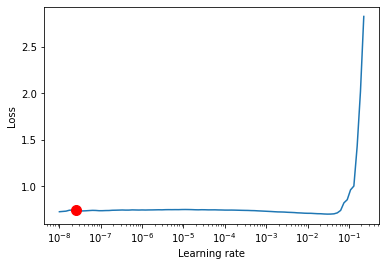

In [14]:
fig = lr_finder.plot(suggest = True)

In [13]:
len(trainloader)

37

In [15]:
baseline_trainer.base_lr = 1e-4
baseline_trainer.max_lr = 1e-2
baseline_trainer.configure_optimizers()

SGD (
Parameter Group 0
    base_momentum: 0.85
    dampening: 0
    initial_lr: 0.002
    lr: 0.002
    max_lr: 0.01
    max_momentum: 0.95
    min_lr: 2e-07
    momentum: 0.95
    nesterov: False
    weight_decay: 1e-05
)

In [16]:
trainer.fit(baseline_trainer)

INFO:lightning:
   | Name                               | Type              | Params
---------------------------------------------------------------------
0  | criterion                          | BCEWithLogitsLoss | 0     
1  | model                              | BaseLineModel     | 11 M  
2  | model.resnet                       | ResNet            | 11 M  
3  | model.resnet.conv1                 | Conv2d            | 9 K   
4  | model.resnet.bn1                   | BatchNorm2d       | 128   
5  | model.resnet.relu                  | ReLU              | 0     
6  | model.resnet.maxpool               | MaxPool2d         | 0     
7  | model.resnet.layer1                | Sequential        | 147 K 
8  | model.resnet.layer1.0              | BasicBlock        | 73 K  
9  | model.resnet.layer1.0.conv1        | Conv2d            | 36 K  
10 | model.resnet.layer1.0.bn1          | BatchNorm2d       | 128   
11 | model.resnet.layer1.0.relu         | ReLU              | 0     
12 | model.resnet

INFO:lightning:
Epoch 00001: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=1_v0.ckpt


INFO:lightning:
Epoch 00002: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=2_v0.ckpt


INFO:lightning:
Epoch 00003: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=3_v0.ckpt


INFO:lightning:
Epoch 00004: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=4_v0.ckpt


INFO:lightning:
Epoch 00005: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=5_v0.ckpt


INFO:lightning:
Epoch 00006: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=6_v0.ckpt


INFO:lightning:
Epoch 00007: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=7_v0.ckpt


INFO:lightning:
Epoch 00008: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=8_v0.ckpt


INFO:lightning:
Epoch 00009: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=9_v0.ckpt


INFO:lightning:
Epoch 00010: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=10_v0.ckpt


INFO:lightning:
Epoch 00011: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=11_v0.ckpt


INFO:lightning:
Epoch 00012: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=12_v0.ckpt


INFO:lightning:
Epoch 00013: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=13_v0.ckpt


INFO:lightning:
Epoch 00014: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=14_v0.ckpt


INFO:lightning:
Epoch 00015: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=15_v0.ckpt


INFO:lightning:
Epoch 00016: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=16_v0.ckpt


INFO:lightning:
Epoch 00017: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=17_v0.ckpt


INFO:lightning:
Epoch 00018: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=18_v0.ckpt


INFO:lightning:
Epoch 00019: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=19_v0.ckpt


INFO:lightning:
Epoch 00020: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=20_v0.ckpt


INFO:lightning:
Epoch 00021: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=21_v0.ckpt


INFO:lightning:
Epoch 00022: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=22_v0.ckpt


INFO:lightning:
Epoch 00023: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=23_v0.ckpt


INFO:lightning:
Epoch 00024: saving model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/baseline/epoch=24_v0.ckpt


1